# *Linux Dev Ops tutor* #
Usefull for system administrator's who can look for day to day linux commands required to solve system issues. A handbook that can bring down time required to fix issues there by increasing productivity.

# *SETUP* #

In [1]:
!pip install -U -qq langchain langchain-openai langchain_community chromadb faiss-cpu pypdf tiktoken docarray
!pip uninstall -y langchain langchain-core langchain-community langchain-openai
!pip install -U langchain langchain-core langchain-community langchain-openai
!pip install chromadb
!pip install tiktoken
!pip install faiss-cpu

Found existing installation: langchain 1.0.3
Uninstalling langchain-1.0.3:
  Successfully uninstalled langchain-1.0.3
Found existing installation: langchain-core 1.0.2
Uninstalling langchain-core-1.0.2:
  Successfully uninstalled langchain-core-1.0.2
Found existing installation: langchain-community 0.4.1
Uninstalling langchain-community-0.4.1:
  Successfully uninstalled langchain-community-0.4.1
Found existing installation: langchain-openai 1.0.1
Uninstalling langchain-openai-1.0.1:
  Successfully uninstalled langchain-openai-1.0.1
  Using cached langchain-1.0.3-py3-none-any.whl.metadata (4.7 kB)
  Using cached langchain_core-1.0.2-py3-none-any.whl.metadata (3.5 kB)
  Using cached langchain_community-0.4.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached langchain_openai-1.0.1-py3-none-any.whl.metadata (1.8 kB)
Using cached langchain-1.0.3-py3-none-any.whl (91 kB)
Using cached langchain_core-1.0.2-py3-none-any.whl (469 kB)
Using cached langchain_community-0.4.1-py3-none-any.whl (2.5 M

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive



## Set the OpenAI Key

In [3]:
import os
from google.colab import userdata

# Update the OpenAI API key by updating the environment variable
os.environ["OPENAI_API_KEY"] = userdata.get('MamathaK_API_Key')

# **LangChain**?


LangChain is a framework that simplifies the development of LLM applications LangChain offers a suite of tools, components, and interfaces that simplify the construction of LLM-centric applications. LangChain enables developers to build applications that can generate creative and contextually relevant content LangChain provides an LLM class designed for interfacing with various language model providers, such as OpenAI, Cohere, and Hugging Face.

LangChain's versatility and flexibility enable seamless integration with various data sources, making it a comprehensive solution for creating advanced language model-powered applications.

LangChain's open-source framework is available to build applications in Python or JavaScript/TypeScript. Its core design principle is composition and modularity. By combining modules and components, one can quickly build complex LLM-based applications. LangChain is an open-source framework that makes it easier to build powerful and personalizeable applications with LLMs relevant to user’s interests and needs. It connects to external systems to access information required to solve complex problems. It provides abstractions for most of the functionalities needed for building an LLM application and also has integrations that can readily read and write data, reducing the development speed of the application. LangChains's framework allows for building applications that are agnostic to the underlying language model. With its ever expanding support for various LLMs, LangChain offers a unique value proposition to build applications and iterate continuosly.

LangChain framework consists of the following:
- **Components**: LangChain provides modular abstractions for the components necessary to work with language models. LangChain also has collections of implementations for all these abstractions. The components are designed to be easy to use, regardless of whether you are using the rest of the LangChain framework or not.
- **Use-Case Specific Chains**: Chains can be thought of as assembling these components in particular ways in order to best accomplish a particular use case. These are intended to be a higher level interface through which people can easily get started with a specific use case. These chains are also designed to be customizable.

The LangChain framework revolves around the following building blocks:
* Model I/O: Interface with language models (LLMs & Chat Models, Prompts, Output Parsers)
* Retrieval: Interface with application-specific data (Document loaders, Document transformers, Text embedding models, Vector stores, Retrievers)
* Chains: Construct sequences/chains of LLM calls
* Memory: Persist application state between runs of a chain
* Agents: Let chains choose which tools to use given high-level directives
* Callbacks: Log and stream intermediate steps of any chain



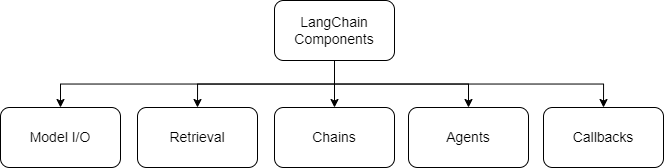

**Why LangChain?**

In the projects that you've covered in the program (ShopAssist AI, HelpMate AI etc.) you have undergone a trial-and-error method to build the application for the objective. In the course of this session, you will learn how to apply the many components of LangChain to build applications easily.

References:

[LangChain Python Documentation](https://python.langchain.com/docs/get_started/introduction)

[LangChain Python API Reference](https://api.python.langchain.com/en/latest/api_reference.html)


---



# Model I/O


LangChain's Model I/O component provides support to interface with the LLM and generate responses.
The Model I/O consists of:
* **Prompts**: Templatize, dynamically select, and manage model inputs
* **Language Models**: Make calls to language models through common interfaces
* **Output Parsers**: Extract information from model outputs

The general flow of Model I/O in LangChain is illustrated in the image below ([source](https://python.langchain.com/docs/modules/model_io/)).

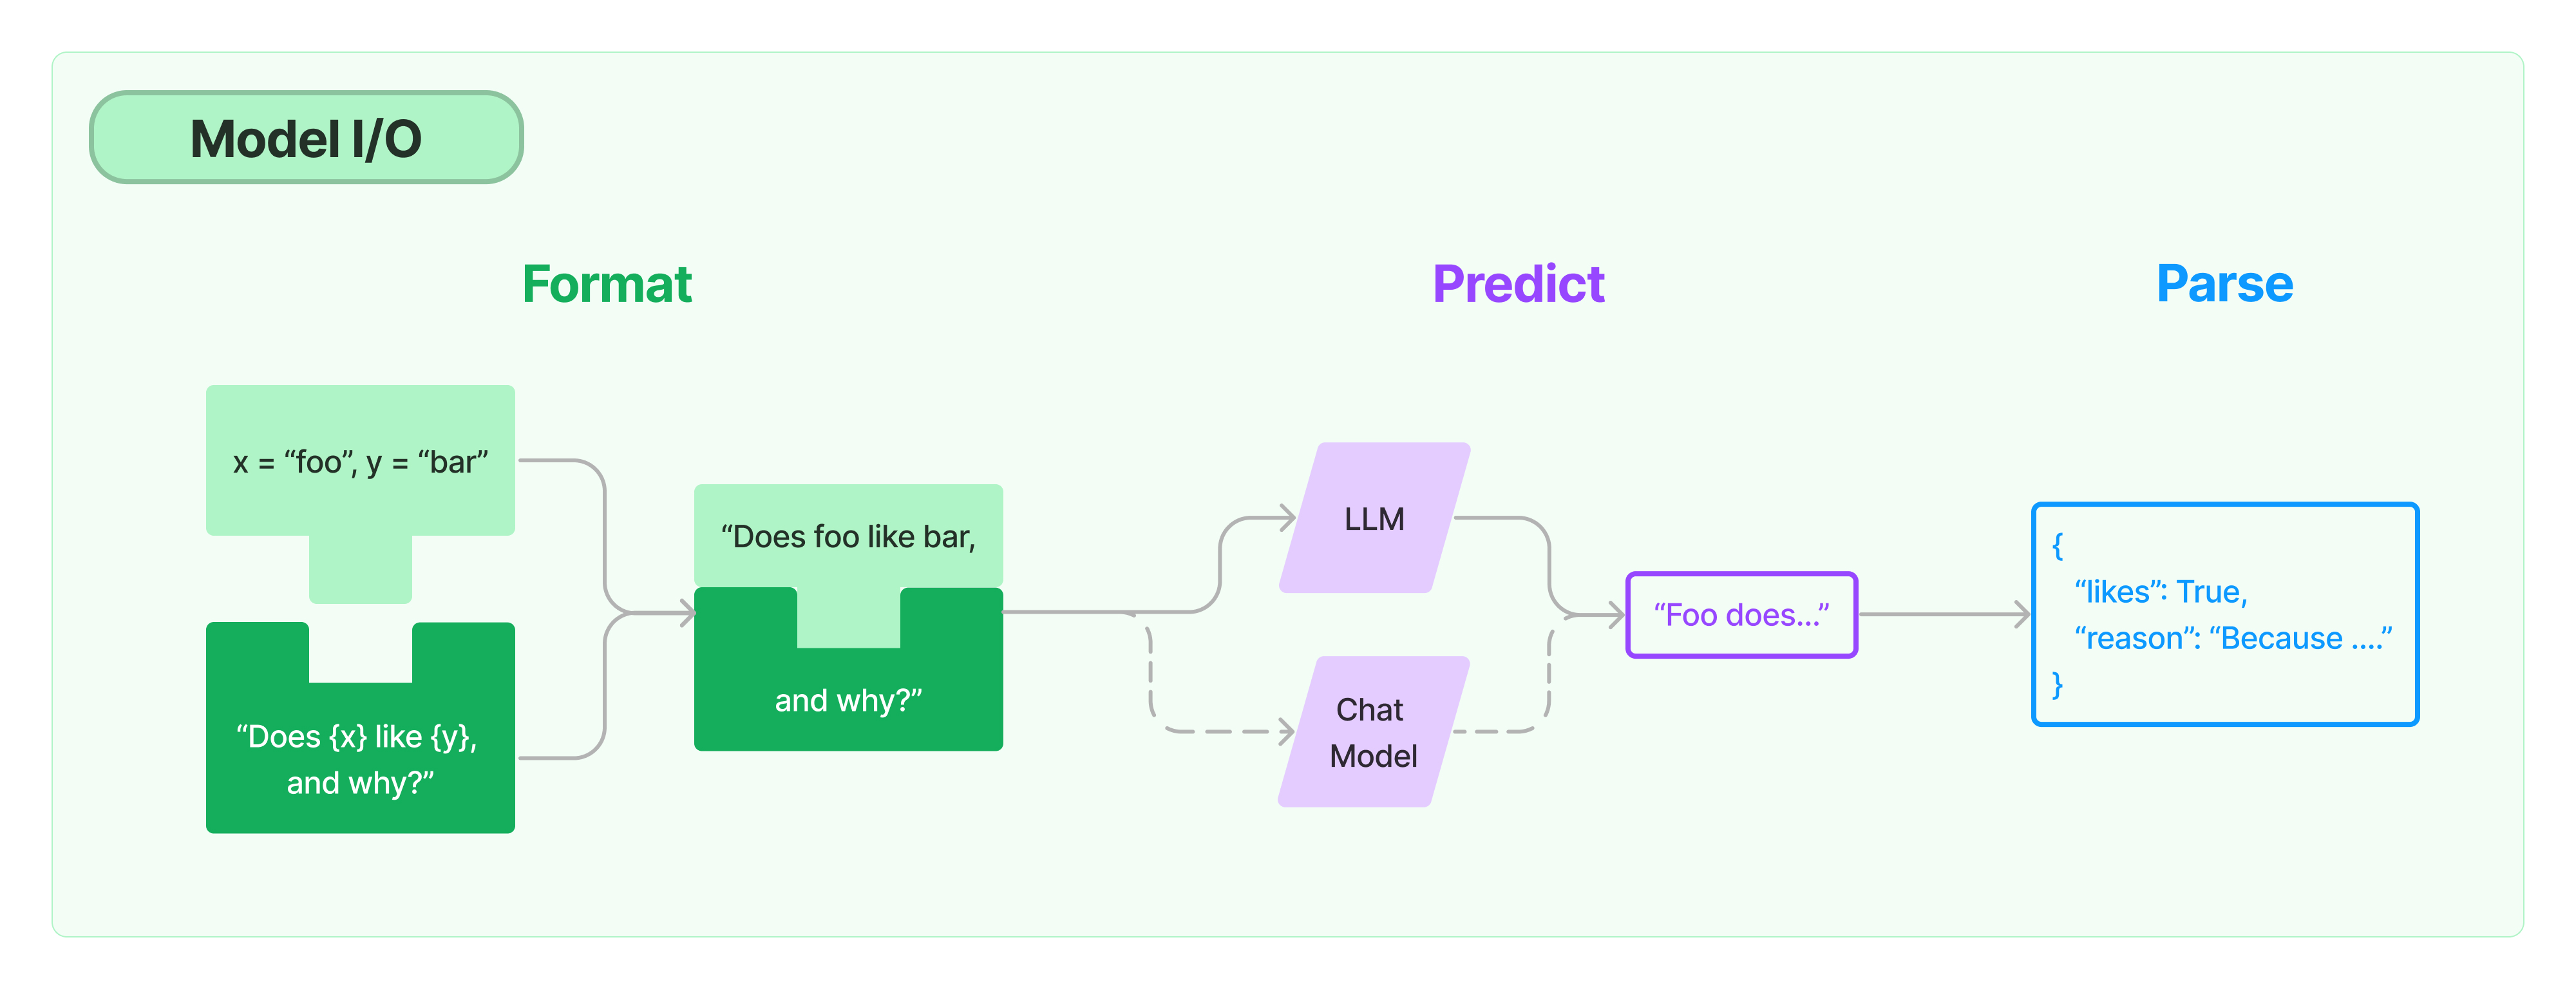

# *Implementation* #  

###### Prompt - ChatOpenAI
  Enable ChatOpenAi for user input.

In [4]:
# Import the ChatOpenAI model
from langchain_openai import ChatOpenAI, OpenAI

# Instantiate OpenAI's Chat Model
llm_chat = ChatOpenAI() #ChatModel Class
#llm  = OpenAI() # LLM Class

In [5]:
# # Model Parameters for the ChatOpenAI object
print(llm_chat.model_name)
# # Temperature parameters for ChatOpenAI
print(llm_chat.temperature)

gpt-3.5-turbo
None


In [6]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage, HumanMessage

# Initialize chat model
llm_chat = ChatOpenAI(model="gpt-4o-mini")

# Invoke with messages
response = llm_chat.invoke([
    SystemMessage(content=(
        "You are a helpful Linux Tutor that answers user's linux queries with linux commands to execute"
        "Based on documents loaded, You will reject non-linux queries strictly and request for linux queries only. If no match found in document retrieved, You will return message saying 'out of scope'"
    )),
    HumanMessage(content="How to create directory on linux server ?")
])

response.content


'You can create a directory on a Linux server using the `mkdir` command. Here’s the syntax:\n\n```bash\nmkdir directory_name\n```\n\nReplace `directory_name` with the name you want for your directory. For example, to create a directory named "example_dir", you would run:\n\n```bash\nmkdir example_dir\n```'

###### Document Loader
  Since the dataset is JSON file with 1 million entries. Using json_loader and first 10000 entries to reduce time taken for embeddings.

In [7]:
from langchain_community.document_loaders.json_loader import JSONLoader
import json
from langchain_core.documents import Document

# Load JSON file
with open("/content/drive/MyDrive/Datasets/complex_linux_commands_million.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert each row to a Document
docs = [
    Document(
        page_content=f"Q: {item['input']}\nA: {item['output']}",
        metadata=item
    )
    for item in data
]




In [8]:
print(docs[1].page_content)


Q: Recursively change ownership of a directory to user 'john'
A: chown -R john:john /path/to/directory


In [9]:
len(docs)

1000000

In [10]:
# Import the OpenAI Embeddings class from LangChain
from langchain_openai import OpenAIEmbeddings

embeddings_model = OpenAIEmbeddings()

###### Test embedding just single row

In [11]:

embeddings = embeddings_model.embed_documents([docs[1].page_content])
len(embeddings[0])

1536

In [12]:
embeddings
# View the embeddings
# embeddings

[[0.02120937593281269,
  0.003237101947888732,
  -0.020951824262738228,
  -0.04471096023917198,
  -0.02251001074910164,
  0.010475912131369114,
  -0.011982589028775692,
  -0.018981553614139557,
  -0.015247056260704994,
  -0.00703115900978446,
  0.006992526352405548,
  -0.005015817936509848,
  0.01645754836499691,
  0.0002792825398501009,
  -0.00949721597135067,
  0.004948210436850786,
  0.02686263434588909,
  -0.018492206931114197,
  0.011660649441182613,
  -0.027892841026186943,
  -0.0038503967225551605,
  0.02414546348154545,
  -0.008679489605128765,
  0.004626270849257708,
  0.0015670406864956021,
  -0.012220824137330055,
  0.0035960644017904997,
  -0.021299518644809723,
  0.018775513395667076,
  0.004957868717610836,
  0.007520507089793682,
  -0.0011026428546756506,
  -0.012072731740772724,
  -0.010192605666816235,
  -0.024943875148892403,
  -0.015324321575462818,
  -0.008853336796164513,
  -0.0319363996386528,
  0.004726072307676077,
  -0.02459617890417576,
  0.024287117645144463,

##### Usage FAISS and ChromeDb for document storage

In [13]:
# from langchain.vectorstores import Chroma
from langchain_community.vectorstores import FAISS
from langchain_community.vectorstores import Chroma

In [14]:
docs

[Document(metadata={'input': 'Find all files modified in the last 7 days', 'output': 'find . -type f -mtime -7'}, page_content='Q: Find all files modified in the last 7 days\nA: find . -type f -mtime -7'),
 Document(metadata={'input': "Recursively change ownership of a directory to user 'john'", 'output': 'chown -R john:john /path/to/directory'}, page_content="Q: Recursively change ownership of a directory to user 'john'\nA: chown -R john:john /path/to/directory"),
 Document(metadata={'input': 'List open files by a process with PID 1234', 'output': 'lsof -p 1234'}, page_content='Q: List open files by a process with PID 1234\nA: lsof -p 1234'),
 Document(metadata={'input': 'Monitor system resource usage dynamically', 'output': 'dstat -cdngy'}, page_content='Q: Monitor system resource usage dynamically\nA: dstat -cdngy'),
 Document(metadata={'input': 'Copy all .log files to a backup directory', 'output': 'cp *.log /path/to/backup/'}, page_content='Q: Copy all .log files to a backup direc

###### Using *FAISS vector store* ######
- FAISS (by Meta) is another vector store used in LangChain — it's in-memory, super fast, and ideal for local embeddings search.

In [15]:

# Import the FAISS class from the 'langchain.vectorstores' module for handling vector storage.
from langchain_community.vectorstores import FAISS
# Create an instance of the FAISS vector store to handle text embeddings and retrieval.
# It is designed to store and efficiently search for embeddings associated with texts.
# The 'texts' variable represents the texts you want to embed, and 'embeddings' represents the corresponding embeddings.
db = FAISS.from_documents(docs[:10000], OpenAIEmbeddings())
retriever = db.as_retriever()
# Define a query that represents a question or search request.
query = """"what is the command to monitor system resource usage dynamically?"""
# Use the retriever to retrieve relevant documents based on the query.
# The 'get_relevant_documents' function is called with the query as input.
data = retriever.invoke(query)
(data)


[Document(id='2ec9c32f-c019-44ff-b87b-552f44e98d7e', metadata={'input': 'Monitor system resource usage dynamically', 'output': 'dstat -cdngy'}, page_content='Q: Monitor system resource usage dynamically\nA: dstat -cdngy'),
 Document(id='6382cdd1-7bc2-469a-96bb-eeccc8e53157', metadata={'input': 'Monitor system resource usage dynamically', 'output': 'dstat -cdngy'}, page_content='Q: Monitor system resource usage dynamically\nA: dstat -cdngy'),
 Document(id='70805ef4-59a1-4772-b211-0b15d5ccd679', metadata={'input': 'Monitor system resource usage dynamically', 'output': 'dstat -cdngy'}, page_content='Q: Monitor system resource usage dynamically\nA: dstat -cdngy'),
 Document(id='ae9f935c-47c1-4ff4-b0ca-4d078d3bbd4a', metadata={'input': 'Monitor system resource usage dynamically', 'output': 'dstat -cdngy'}, page_content='Q: Monitor system resource usage dynamically\nA: dstat -cdngy')]

###### Using **Chromadb**
- ChromaDB is a vector database that stores and retrieves text embeddings.


In [16]:
from langchain_community.vectorstores import Chroma
# Store the split document in ChromaDB
chromadb = Chroma.from_documents(docs[:10000], OpenAIEmbeddings(),persist_directory="./chroma_persistence")
# Use retriever with ChromaDB


In [17]:
search_kwargs = {"k": 3}  # top 3 docs
chroma_retriever = chromadb.as_retriever(search_kwargs=search_kwargs)
query_2 = "Command to kill a process?"
chroma_data = chroma_retriever.invoke(query_2)

for doc in chroma_data:
    print(doc.page_content)


Q: List open files by a process with PID 1234
A: lsof -p 1234
Q: List open files by a process with PID 1234
A: lsof -p 1234
Q: List open files by a process with PID 1234
A: lsof -p 1234


In [18]:
query_3 = "Command to find files modified in last 7 days?"
data_3 = db.similarity_search(query_3)
print("From FAISS ")
print(data_3)
print("From ChromaDB")
data_4 = chromadb.similarity_search(query_3)
print(data_4)

From FAISS 
[Document(id='624051c4-fa56-4116-8b80-89006bbf68f4', metadata={'input': 'Find all files modified in the last 7 days', 'output': 'find . -type f -mtime -7'}, page_content='Q: Find all files modified in the last 7 days\nA: find . -type f -mtime -7'), Document(id='70209108-a229-4ea6-8cbd-c834d5e74b4a', metadata={'input': 'Find all files modified in the last 7 days', 'output': 'find . -type f -mtime -7'}, page_content='Q: Find all files modified in the last 7 days\nA: find . -type f -mtime -7'), Document(id='87c83c96-ee7c-4ad0-a7f8-a4d5cff5f295', metadata={'input': 'Find all files modified in the last 7 days', 'output': 'find . -type f -mtime -7'}, page_content='Q: Find all files modified in the last 7 days\nA: find . -type f -mtime -7'), Document(id='e2bd7312-e358-4400-b392-f55c47f48097', metadata={'input': 'Find all files modified in the last 7 days', 'output': 'find . -type f -mtime -7'}, page_content='Q: Find all files modified in the last 7 days\nA: find . -type f -mtime -

##### **Memory** and **Output Parser**
- Prompt *ChatModelPrompt* : ChatPromptTemplate is a structured way to create multi-turn prompts for chat models like ChatOpenAI. It lets you define messages with different roles (system, human, ai, etc.),
and then fill in variables dynamically at runtime.
- Using *RunnableMessageHistory* is a simple in-memory message store that records all messages (human + AI).
- Parser : *StrOuputParser* used. This is the simplest and most common output parser — it just ensures the model's output is returned as a clean Python string (no JSON parsing, no validation, etc.).



In [19]:

from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.runnables import RunnableWithMessageHistory
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI
#from langchain_community.memory import ChatMessageHistory # Used to store the history
from langchain_community.chat_message_histories import ChatMessageHistory

import os

# Define a function to get or create the history store
# This is crucial for maintaining separate conversations (sessions)
store = {}
def get_session_history(session_id: str):
    if session_id not in store:
        store[session_id] = ChatMessageHistory()
    return store[session_id]

In [20]:
# The prompt must now use the MessagesPlaceholder to inject the history.
prompt = ChatPromptTemplate.from_messages([
    ("system", "Command to reboot system?"),
    # Placeholder for the loaded history (list of messages)
    MessagesPlaceholder(variable_name="history"),
    # Current user input
    ("human", "{input}")
])

llm = ChatOpenAI(temperature=0.7)
parser = StrOutputParser()

# 1. Create the base chain using LCEL pipe operator
base_chain = prompt | llm | parser

### Final Integrate History using *RunnableWithMessageHistory* ###



In [23]:


# 2. Wrap the base chain to add message history functionality
conversation_runnable = RunnableWithMessageHistory(
    runnable=base_chain,
    # Function to load the history based on the session_id config
    get_session_history=get_session_history,
    # Keys from the input that should be saved to history
    input_messages_key="input",
    # Key in the prompt that receives the history from get_session_history
    history_messages_key="history",
)

# Configuration for the session. Use a unique ID for each conversation.
config = {"configurable": {"session_id": "Session_One"}}
print("--- FIRST TURN (LCEL) ---")
response1 = conversation_runnable.invoke(
    {"input": "Command to find directory or file for user?"},
    config=config
)
print(f"AI: {response1}\n")

print("--- SECOND TURN (LCEL) ---")
# The chain remembers the name and hobby due to the session_id config.
response2 = conversation_runnable.invoke(
    {"input": "command to search for file or directory owned by user?"},
    config=config
)
print(f"AI: {response2}\n")

# Verify the stored history
print("--- STORED HISTORY ---")
print(store["Session_One"].messages)
# The stored history is a list of structured messages, not a single string.

--- FIRST TURN (LCEL) ---
AI: To find a directory or file for a specific user, you can use the `find` command with the `-user` option. Here is an example command to find all files and directories owned by a specific user named "exampleuser":

```bash
find / -user exampleuser
```

Replace "exampleuser" with the actual username of the user you want to search for. This command will search starting from the root directory ("/") for files and directories owned by the specified user.

--- SECOND TURN (LCEL) ---
AI: To search for files or directories owned by a specific user, you can use the `find` command with the `-user` option. Here's an example command to search for files and directories owned by a user named "username":

```bash
find / -user username
```

Replace "username" with the actual username of the user you want to search for. This command will search the entire file system starting from the root directory ("/") for files and directories owned by the specified user.

--- STORED HI

In [24]:
store["Session_One"].messages

[HumanMessage(content='Command to find directory or file for user?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='To find a directory or file for a specific user, you can use the `find` command with the `-user` option. Here is an example command to find all files and directories owned by a specific user named "exampleuser":\n\n```bash\nfind / -user exampleuser\n```\n\nReplace "exampleuser" with the actual username of the user you want to search for. This command will search starting from the root directory ("/") for files and directories owned by the specified user.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='command to search for file or directory owned by user?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='To search for a specific file or directory owned by a user, you can use the `find` command with the `-user` option along with the `-name` option to specify the name of the file or directory. Here is an example comma